<a href="https://colab.research.google.com/github/monjjjjj/stockprice_prediction/blob/main/StockPrice_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from google.colab import drive

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
training_set = pd.read_csv('/content/drive/MyDrive/StockPrice_prediction/Starbucks_Stock_2014_2018.csv')
#training_set.head()

training_set["Date"] = pd.to_datetime(training_set["Date"])
training_set["year"] = training_set["Date"].dt.year
training_set["month"] = training_set["Date"].dt.month
training_set["date"] = training_set["Date"].dt.day
training_set["day"] = training_set["Date"].dt.dayofweek
#training_set.head()

training_set =  training_set.drop(["Date"], axis=1)
#training_set.head()

training_set = training_set.iloc[::-1]
#training_set.head()

In [4]:
#training_set = training_set.iloc[:, 1:2].values
#print(training_set)
#print(len(training_set))

In [5]:
training_set = training_set.iloc[:, 1:2].values

scaler = MinMaxScaler()
training_set = scaler.fit_transform(training_set)

X_train = training_set[0:1257]
y_train = training_set[1:1258]
X_train = np.reshape(X_train, (1257, 1, 1))

In [6]:
model = Sequential()
model.add(LSTM(units = 100, activation = 'sigmoid', input_shape = (None, 1)))
model.add(Dense(units = 1))
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model.fit(X_train, y_train, batch_size = 4, epochs = 100)

print(model.summary())

Epoch 1/100
315/315 [==============================] - 5s 4ms/step - loss: 0.0418
Epoch 2/100
315/315 [==============================] - 1s 4ms/step - loss: 0.0097
Epoch 3/100
315/315 [==============================] - 1s 4ms/step - loss: 0.0012
Epoch 4/100
315/315 [==============================] - 1s 4ms/step - loss: 3.8880e-04
Epoch 5/100
315/315 [==============================] - 1s 4ms/step - loss: 3.7405e-04
Epoch 6/100
315/315 [==============================] - 1s 4ms/step - loss: 3.7290e-04
Epoch 7/100
315/315 [==============================] - 1s 4ms/step - loss: 3.8328e-04
Epoch 8/100
315/315 [==============================] - 1s 4ms/step - loss: 3.9527e-04
Epoch 9/100
315/315 [==============================] - 1s 4ms/step - loss: 3.7844e-04
Epoch 10/100
315/315 [==============================] - 1s 4ms/step - loss: 4.2866e-04
Epoch 11/100
315/315 [==============================] - 1s 4ms/step - loss: 4.3960e-04
Epoch 12/100
315/315 [==============================] - 1s 4ms/s

In [7]:
test_set = pd.read_csv('/content/drive/MyDrive/StockPrice_prediction/Starbucks_Stock_2019_test.csv')
real_stock_price = test_set.iloc[:,1:2].values
inputs = real_stock_price
inputs = scaler.transform(inputs)
inputs = np.reshape(inputs, (7, 1, 1))
predicted_stock_price = model.predict(inputs)
predicted_stock_price = scaler.inverse_transform(predicted_stock_price)

1/1 [==============================] - 0s 159ms/step


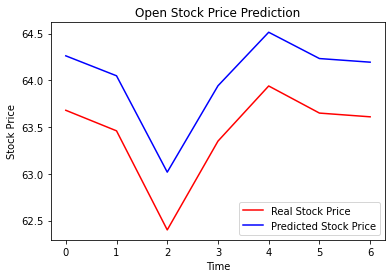

In [8]:
plt.plot(real_stock_price, color = 'red', label = 'Real Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Stock Price')
plt.title('Open Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

40/40 [==============================] - 0s 2ms/step


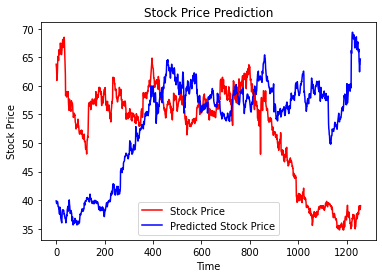

In [9]:
# Making predictions for the entire dataset
# Getting the real stock price of 2017 - 2021
real_stock_price_train = pd.read_csv('/content/drive/MyDrive/StockPrice_prediction/Starbucks_Stock_2014_2018.csv')
real_stock_price_train = real_stock_price_train.iloc[:,1:2].values

# Getting the predicted stock price of 2017 - 2021
predicted_stock_price_train = model.predict(X_train)
predicted_stock_price_train = scaler.inverse_transform(predicted_stock_price_train)

# Visualising the results
plt.plot(real_stock_price_train, color = 'red', label = 'Stock Price')
plt.plot(predicted_stock_price_train, color = 'blue', label = 'Predicted Stock Price')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [10]:
import math
from sklearn.metrics import mean_squared_error
rmse = math.sqrt(mean_squared_error(real_stock_price, predicted_stock_price))